# 1.2.4: Bikeshare (Stepping Forward in Time)

<br>



---



*Modeling and Simulation in Python*


Copyright 2021 Allen Downey, (License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/))

Revised, Mike Augspurger (2021-present)

<br>

---





### Importing Libraries and Functions

We've imported libaries like Pandas and Numpy before.  From now on, we'll just put these import lines at the beginning of the notebook.  In addition, we'll sometimes "import" functions from the previous notebook by including them in the import cell.  You can always unhide the cell to look at or copy the code if you need to.

<br>

But be sure to run this cell before you work on the notebook.  If you get an error that looks like `NameError: name 'bike_to_moline' is not defined`, there's a good chance you forgot to run this cell

In [1]:
# @title
import pandas as pd
import numpy.random as npr

def bike_to_augie():
    bikeshare.moline -= 1
    bikeshare.augie += 1

def bike_to_moline():
    bikeshare.moline += 1
    bikeshare.augie -= 1

def change_func(ptm, pta):
    if npr.random() < ptm:
        bike_to_moline()
    if npr.random() < pta:
        bike_to_augie()

## Moving the Simulation through Time

We have a way to keep track of the state of the system (*state variables*), and a rule for how things will change (*change function*).   Now we need to see what happens when time moves forward!

### Repeating actions with a for-loop

At some point you will get sick of running cells over and over.
Fortunately, there is an easy way to repeat a chunk of code, the *for-loop*. Here's an example:

In [3]:
a = 4.0
for i in range(3):
    print(i)
    a += 1
print("a is now", a)

0
1
2
a is now 7.0


The syntax here should look familiar; the first line of the loop ends with a
colon, and the lines inside the `for` loop are indented. The other
elements of the loop are:

-   The words `for` and `in` are specialized words to be used in loops.

-   `range` is a Python function we use to control the number of times the loop runs.  Here it defines the number of times that the loop runs.

-   `i` is a *loop variable* that gets created when the for-loop runs. Notice that the first time, the value of `i` is `0`; the second time, it is `1`; the third time, it is `2`.  In this simple form, the loop variable always starts at `0`.

### Recording change with a Series

We'll use a loop to move through a significant number of time steps (running the change function in each loop).  But when we run a simulation, we often want to save the results for later analysis. We can save those results in a `Series`.  

<br>

In this Series, the labels (the `index`) will be integers representing the time steps.  The values in the series will the number of bikes at Augie.  When we create the Series, which we'll call "results", it will be empty, because we don't know the values yet:

In [8]:
results = pd.Series([], dtype=object)
results.name='Bikes at Augie'
results.index.name = 'Time Steps'

* The first line creates a `Series` with no values: the "[ ]" signifies there are no current values, but values might be added later. `dtype` tells it to expect any kind of object in the series.  

* The next two lines give a title to the index column and to the values column.

Now we can add the initial state (number of bikes at Augie) to our empty `Series` like this:

In [9]:
bikeshare = pd.Series(dict(augie=10,moline=2),name="Number of Bikes")
results[0] = bikeshare.augie
results

Time Steps
0    10
Name: Bikes at Augie, dtype: int64

The number in brackets is the *label* for the first entry: that is, it is the initial state.  At this point, `results` looks like this:

<br>

<center>
<img src = https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Images/1_2/Series_empty.PNG width = 300>
</center>


### Running the simulation

Now we can begin our simulation!  We'll use a for-loop to run through 5 time steps, and save the changes in `results` for each step

In [28]:
# Reset the values of bikeshare
bikeshare = pd.Series(dict(augie=10,moline=2),name="Number of Bikes")
results[0] = bikeshare.augie

# Run the simulation for 5 time steps:
for i in range(5):
    change_func(0.5, 0.4)
    results[i+1] = bikeshare.augie

# Output the results
results

Time Steps
0    10
1    10
2    10
3     9
4     8
5     8
Name: Bikes at Augie, dtype: int64

Each time through the loop, we call `change_func`, which updates `bikeshare`.
Then we store the number of bikes at Augustana at that time step in `results`.
We use the loop variable, `i`, to compute the time step, `i+1`.

<br>

The first time through the loop, the value of `i` is `0`, so the time step is `1`.
The last time, the value of `i` is `4`, so the time step is `5`.  When the loop exits, `results` contains 6 time steps, from 0 through
5, where time 0 is the initial state.  `results` stores the number of bikes at Augie at the end of each time step.  

### Displaying the results with 'plot()'

`Series` provides a function called `plot()` we can use to plot
the results.  `Plot()` is a function that is built into the Series data object (technically, this is called a *method* of Series).

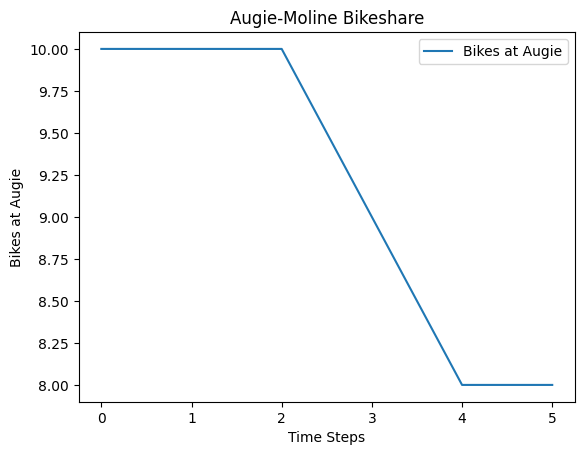

In [29]:
results.plot(xlabel=results.index.name, ylabel=results.name,
            title='Augie-Moline Bikeshare',
            legend=True);

The result should be a plot with time on the $x$-axis and the number of bikes on the $y$-axis.
Since we only ran five time steps, it might not be very interesting.

<br>

You can probably figure out what the arguments of `plot()` do.  But you could also look up more options by checking the documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html).



---



## Exercises

---



🟨 🟨

### Exercise 1

In the future notebooks, we'll look for ways that we can improve this model.  In preparation, take a moment and try to list 3 aspects of a realistic bikeshare system that this model does not take into account.   Choose one of the aspects that you think might make the biggest difference, and suggest in a couple sentences how you might incorporate that aspect into the model (not in terms of code--just in terms of process).  


✅ ✅  Put your answer here